In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df = df.iloc[:,1:]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
ohe = LabelEncoder()
df['Gender'] = ohe.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(320, 3)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=3))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


# Batch Gradient Descent

In [15]:
import time
start = time.time()
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=1000,batch_size=X_train.shape[0],validation_split=0.2)
print(time.time()-start)

Epoch 1/1000


C:\Users\Nihar\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1/1 [==============================] - 1s 1s/step - loss: 0.7269 - accuracy: 0.4648 - val_loss: 0.6949 - val_accuracy: 0.5469
Epoch 2/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.7193 - accuracy: 0.4805 - val_loss: 0.6892 - val_accuracy: 0.5781
Epoch 3/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.7139 - accuracy: 0.5078 - val_loss: 0.6844 - val_accuracy: 0.5938
Epoch 4/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.7094 - accuracy: 0.5117 - val_loss: 0.6802 - val_accuracy: 0.5781
Epoch 5/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.7055 - accuracy: 0.5234 - val_loss: 0.6763 - val_accuracy: 0.6094
Epoch 6/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.7019 - accuracy: 0.5273 - val_loss: 0.6725 - val_accuracy: 0.6406
Epoch 7/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6984 - accuracy: 0.5391 - val_loss: 0.6689 - val_accuracy: 0.6406
Epoch 8/1000
1/1 [==========

Epoch 59/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.5882 - accuracy: 0.6328 - val_loss: 0.5540 - val_accuracy: 0.7031
Epoch 60/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.5864 - accuracy: 0.6328 - val_loss: 0.5523 - val_accuracy: 0.7031
Epoch 61/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.5847 - accuracy: 0.6328 - val_loss: 0.5505 - val_accuracy: 0.7031
Epoch 62/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.5829 - accuracy: 0.6328 - val_loss: 0.5488 - val_accuracy: 0.7031
Epoch 63/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.5812 - accuracy: 0.6328 - val_loss: 0.5471 - val_accuracy: 0.7031
Epoch 64/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.5794 - accuracy: 0.6328 - val_loss: 0.5453 - val_accuracy: 0.6875
Epoch 65/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.5777 - accuracy: 0.6328 - val_loss: 0.5436 - val_accuracy: 0.6875
Epoch 

1/1 [==============================] - 0s 20ms/step - loss: 0.4916 - accuracy: 0.8242 - val_loss: 0.4596 - val_accuracy: 0.7969
Epoch 117/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.4899 - accuracy: 0.8242 - val_loss: 0.4579 - val_accuracy: 0.7969
Epoch 118/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.4882 - accuracy: 0.8242 - val_loss: 0.4562 - val_accuracy: 0.8281
Epoch 119/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.4865 - accuracy: 0.8242 - val_loss: 0.4544 - val_accuracy: 0.8281
Epoch 120/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.4847 - accuracy: 0.8203 - val_loss: 0.4527 - val_accuracy: 0.8281
Epoch 121/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.4830 - accuracy: 0.8203 - val_loss: 0.4509 - val_accuracy: 0.8438
Epoch 122/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4813 - accuracy: 0.8242 - val_loss: 0.4492 - val_accuracy: 0.8438
Epoch 123/1000

1/1 [==============================] - 0s 20ms/step - loss: 0.3982 - accuracy: 0.8438 - val_loss: 0.3666 - val_accuracy: 0.8906
Epoch 174/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.3968 - accuracy: 0.8438 - val_loss: 0.3652 - val_accuracy: 0.8906
Epoch 175/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.3953 - accuracy: 0.8438 - val_loss: 0.3637 - val_accuracy: 0.8906
Epoch 176/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.3939 - accuracy: 0.8438 - val_loss: 0.3622 - val_accuracy: 0.8906
Epoch 177/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.3924 - accuracy: 0.8438 - val_loss: 0.3608 - val_accuracy: 0.8906
Epoch 178/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3910 - accuracy: 0.8438 - val_loss: 0.3593 - val_accuracy: 0.8906
Epoch 179/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.3896 - accuracy: 0.8438 - val_loss: 0.3580 - val_accuracy: 0.8906
Epoch 180/1000

1/1 [==============================] - 0s 22ms/step - loss: 0.3277 - accuracy: 0.8633 - val_loss: 0.3007 - val_accuracy: 0.8906
Epoch 231/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.3267 - accuracy: 0.8633 - val_loss: 0.2999 - val_accuracy: 0.8906
Epoch 232/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3257 - accuracy: 0.8633 - val_loss: 0.2991 - val_accuracy: 0.8906
Epoch 233/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.3246 - accuracy: 0.8633 - val_loss: 0.2984 - val_accuracy: 0.8906
Epoch 234/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.3236 - accuracy: 0.8633 - val_loss: 0.2976 - val_accuracy: 0.8906
Epoch 235/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.3225 - accuracy: 0.8633 - val_loss: 0.2968 - val_accuracy: 0.8906
Epoch 236/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.3215 - accuracy: 0.8672 - val_loss: 0.2960 - val_accuracy: 0.8906
Epoch 237/1000

1/1 [==============================] - 0s 20ms/step - loss: 0.2811 - accuracy: 0.8867 - val_loss: 0.2707 - val_accuracy: 0.8750
Epoch 288/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2805 - accuracy: 0.8867 - val_loss: 0.2702 - val_accuracy: 0.8750
Epoch 289/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2799 - accuracy: 0.8867 - val_loss: 0.2700 - val_accuracy: 0.8750
Epoch 290/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2792 - accuracy: 0.8867 - val_loss: 0.2696 - val_accuracy: 0.8750
Epoch 291/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2786 - accuracy: 0.8867 - val_loss: 0.2694 - val_accuracy: 0.8750
Epoch 292/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2780 - accuracy: 0.8867 - val_loss: 0.2691 - val_accuracy: 0.8750
Epoch 293/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2774 - accuracy: 0.8906 - val_loss: 0.2686 - val_accuracy: 0.8750
Epoch 294/1000

1/1 [==============================] - 0s 20ms/step - loss: 0.2486 - accuracy: 0.9023 - val_loss: 0.2611 - val_accuracy: 0.8906
Epoch 345/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2482 - accuracy: 0.9062 - val_loss: 0.2609 - val_accuracy: 0.8906
Epoch 346/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.2477 - accuracy: 0.9023 - val_loss: 0.2610 - val_accuracy: 0.8906
Epoch 347/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2473 - accuracy: 0.9062 - val_loss: 0.2608 - val_accuracy: 0.8906
Epoch 348/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2468 - accuracy: 0.9062 - val_loss: 0.2609 - val_accuracy: 0.8906
Epoch 349/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2464 - accuracy: 0.9062 - val_loss: 0.2609 - val_accuracy: 0.8906
Epoch 350/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2460 - accuracy: 0.9062 - val_loss: 0.2608 - val_accuracy: 0.8906
Epoch 351/1000

1/1 [==============================] - 0s 22ms/step - loss: 0.2283 - accuracy: 0.9102 - val_loss: 0.2644 - val_accuracy: 0.9062
Epoch 402/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2280 - accuracy: 0.9102 - val_loss: 0.2649 - val_accuracy: 0.9062
Epoch 403/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2277 - accuracy: 0.9102 - val_loss: 0.2647 - val_accuracy: 0.9062
Epoch 404/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.2275 - accuracy: 0.9102 - val_loss: 0.2650 - val_accuracy: 0.9062
Epoch 405/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2272 - accuracy: 0.9102 - val_loss: 0.2649 - val_accuracy: 0.9062
Epoch 406/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2269 - accuracy: 0.9102 - val_loss: 0.2652 - val_accuracy: 0.9062
Epoch 407/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2267 - accuracy: 0.9102 - val_loss: 0.2652 - val_accuracy: 0.9062
Epoch 408/1000

1/1 [==============================] - 0s 24ms/step - loss: 0.2161 - accuracy: 0.9141 - val_loss: 0.2702 - val_accuracy: 0.9062
Epoch 459/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2159 - accuracy: 0.9141 - val_loss: 0.2696 - val_accuracy: 0.9062
Epoch 460/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2158 - accuracy: 0.9141 - val_loss: 0.2703 - val_accuracy: 0.9062
Epoch 461/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2156 - accuracy: 0.9141 - val_loss: 0.2695 - val_accuracy: 0.9062
Epoch 462/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2154 - accuracy: 0.9141 - val_loss: 0.2701 - val_accuracy: 0.9062
Epoch 463/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2153 - accuracy: 0.9141 - val_loss: 0.2693 - val_accuracy: 0.9062
Epoch 464/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2151 - accuracy: 0.9141 - val_loss: 0.2700 - val_accuracy: 0.9062
Epoch 465/1000

1/1 [==============================] - 0s 27ms/step - loss: 0.2074 - accuracy: 0.9141 - val_loss: 0.2716 - val_accuracy: 0.9062
Epoch 516/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.2073 - accuracy: 0.9141 - val_loss: 0.2713 - val_accuracy: 0.9062
Epoch 517/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.2072 - accuracy: 0.9141 - val_loss: 0.2717 - val_accuracy: 0.9062
Epoch 518/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.2070 - accuracy: 0.9141 - val_loss: 0.2715 - val_accuracy: 0.9062
Epoch 519/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.2069 - accuracy: 0.9141 - val_loss: 0.2716 - val_accuracy: 0.9062
Epoch 520/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.2067 - accuracy: 0.9141 - val_loss: 0.2714 - val_accuracy: 0.9062
Epoch 521/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.2066 - accuracy: 0.9141 - val_loss: 0.2717 - val_accuracy: 0.9062
Epoch 522/1000

1/1 [==============================] - 0s 24ms/step - loss: 0.2006 - accuracy: 0.9180 - val_loss: 0.2756 - val_accuracy: 0.9062
Epoch 573/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2005 - accuracy: 0.9219 - val_loss: 0.2754 - val_accuracy: 0.9062
Epoch 574/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2004 - accuracy: 0.9219 - val_loss: 0.2754 - val_accuracy: 0.9062
Epoch 575/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2003 - accuracy: 0.9219 - val_loss: 0.2755 - val_accuracy: 0.9062
Epoch 576/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.2002 - accuracy: 0.9219 - val_loss: 0.2758 - val_accuracy: 0.9062
Epoch 577/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.2001 - accuracy: 0.9219 - val_loss: 0.2753 - val_accuracy: 0.9062
Epoch 578/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.2000 - accuracy: 0.9219 - val_loss: 0.2761 - val_accuracy: 0.9062
Epoch 579/1000

1/1 [==============================] - 0s 24ms/step - loss: 0.1949 - accuracy: 0.9219 - val_loss: 0.2798 - val_accuracy: 0.9062
Epoch 630/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1948 - accuracy: 0.9219 - val_loss: 0.2809 - val_accuracy: 0.9062
Epoch 631/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1947 - accuracy: 0.9219 - val_loss: 0.2800 - val_accuracy: 0.9062
Epoch 632/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1946 - accuracy: 0.9219 - val_loss: 0.2809 - val_accuracy: 0.9062
Epoch 633/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1945 - accuracy: 0.9219 - val_loss: 0.2802 - val_accuracy: 0.9062
Epoch 634/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1944 - accuracy: 0.9219 - val_loss: 0.2807 - val_accuracy: 0.9062
Epoch 635/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1943 - accuracy: 0.9219 - val_loss: 0.2810 - val_accuracy: 0.9062
Epoch 636/1000

1/1 [==============================] - 0s 24ms/step - loss: 0.1896 - accuracy: 0.9297 - val_loss: 0.2857 - val_accuracy: 0.9062
Epoch 687/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1895 - accuracy: 0.9297 - val_loss: 0.2861 - val_accuracy: 0.9062
Epoch 688/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1895 - accuracy: 0.9297 - val_loss: 0.2858 - val_accuracy: 0.9062
Epoch 689/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1894 - accuracy: 0.9258 - val_loss: 0.2862 - val_accuracy: 0.9062
Epoch 690/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1893 - accuracy: 0.9297 - val_loss: 0.2857 - val_accuracy: 0.9062
Epoch 691/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1892 - accuracy: 0.9258 - val_loss: 0.2866 - val_accuracy: 0.9062
Epoch 692/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1891 - accuracy: 0.9297 - val_loss: 0.2860 - val_accuracy: 0.9062
Epoch 693/1000

1/1 [==============================] - 0s 30ms/step - loss: 0.1854 - accuracy: 0.9297 - val_loss: 0.2920 - val_accuracy: 0.9062
Epoch 744/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1853 - accuracy: 0.9336 - val_loss: 0.2909 - val_accuracy: 0.9062
Epoch 745/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1853 - accuracy: 0.9258 - val_loss: 0.2926 - val_accuracy: 0.9062
Epoch 746/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1852 - accuracy: 0.9336 - val_loss: 0.2913 - val_accuracy: 0.9062
Epoch 747/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1851 - accuracy: 0.9297 - val_loss: 0.2926 - val_accuracy: 0.9062
Epoch 748/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1851 - accuracy: 0.9336 - val_loss: 0.2915 - val_accuracy: 0.9062
Epoch 749/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1850 - accuracy: 0.9297 - val_loss: 0.2924 - val_accuracy: 0.9062
Epoch 750/1000

1/1 [==============================] - 0s 23ms/step - loss: 0.1816 - accuracy: 0.9336 - val_loss: 0.2955 - val_accuracy: 0.9062
Epoch 801/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1815 - accuracy: 0.9336 - val_loss: 0.2959 - val_accuracy: 0.9062
Epoch 802/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1814 - accuracy: 0.9336 - val_loss: 0.2955 - val_accuracy: 0.9062
Epoch 803/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1814 - accuracy: 0.9336 - val_loss: 0.2963 - val_accuracy: 0.9062
Epoch 804/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1813 - accuracy: 0.9336 - val_loss: 0.2957 - val_accuracy: 0.9062
Epoch 805/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1812 - accuracy: 0.9336 - val_loss: 0.2965 - val_accuracy: 0.9062
Epoch 806/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1812 - accuracy: 0.9336 - val_loss: 0.2958 - val_accuracy: 0.9062
Epoch 807/1000

1/1 [==============================] - 0s 25ms/step - loss: 0.1778 - accuracy: 0.9336 - val_loss: 0.3018 - val_accuracy: 0.9062
Epoch 858/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1777 - accuracy: 0.9336 - val_loss: 0.3011 - val_accuracy: 0.9062
Epoch 859/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1776 - accuracy: 0.9336 - val_loss: 0.3019 - val_accuracy: 0.9062
Epoch 860/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1776 - accuracy: 0.9336 - val_loss: 0.3014 - val_accuracy: 0.9062
Epoch 861/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1775 - accuracy: 0.9336 - val_loss: 0.3022 - val_accuracy: 0.9062
Epoch 862/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1775 - accuracy: 0.9336 - val_loss: 0.3014 - val_accuracy: 0.9062
Epoch 863/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1774 - accuracy: 0.9336 - val_loss: 0.3025 - val_accuracy: 0.9062
Epoch 864/1000

1/1 [==============================] - 0s 25ms/step - loss: 0.1728 - accuracy: 0.9336 - val_loss: 0.3041 - val_accuracy: 0.9062
Epoch 915/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.1727 - accuracy: 0.9336 - val_loss: 0.3048 - val_accuracy: 0.9062
Epoch 916/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1726 - accuracy: 0.9336 - val_loss: 0.3045 - val_accuracy: 0.9062
Epoch 917/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1725 - accuracy: 0.9336 - val_loss: 0.3052 - val_accuracy: 0.9062
Epoch 918/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1724 - accuracy: 0.9336 - val_loss: 0.3042 - val_accuracy: 0.9062
Epoch 919/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1723 - accuracy: 0.9336 - val_loss: 0.3054 - val_accuracy: 0.9062
Epoch 920/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1722 - accuracy: 0.9336 - val_loss: 0.3047 - val_accuracy: 0.9062
Epoch 921/1000

1/1 [==============================] - 0s 25ms/step - loss: 0.1677 - accuracy: 0.9336 - val_loss: 0.3107 - val_accuracy: 0.9062
Epoch 972/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1675 - accuracy: 0.9297 - val_loss: 0.3100 - val_accuracy: 0.9062
Epoch 973/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1675 - accuracy: 0.9336 - val_loss: 0.3107 - val_accuracy: 0.9062
Epoch 974/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1674 - accuracy: 0.9336 - val_loss: 0.3105 - val_accuracy: 0.9062
Epoch 975/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1673 - accuracy: 0.9336 - val_loss: 0.3112 - val_accuracy: 0.9062
Epoch 976/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1672 - accuracy: 0.9297 - val_loss: 0.3105 - val_accuracy: 0.9062
Epoch 977/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1672 - accuracy: 0.9336 - val_loss: 0.3113 - val_accuracy: 0.9062
Epoch 978/1000

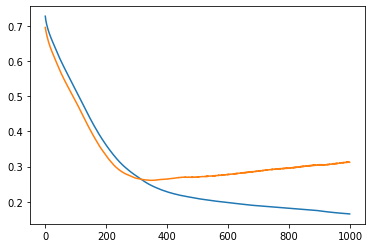

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

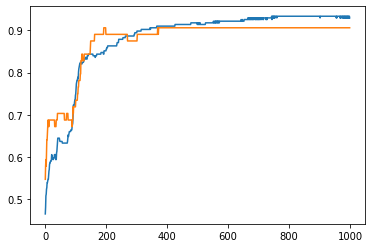

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

###  when make a model with a batch size of Xtrain data is called batch gradient descent That means it will made one batch per epochs

#  Stochastic Gradient Descent

In [18]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=3))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

start = time.time()
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=1000,batch_size=1,validation_split=0.2)
print(time.time()-start)

Epoch 1/1000
256/256 [==============================] - 1s 3ms/step - loss: 0.6283 - accuracy: 0.7305 - val_loss: 0.5554 - val_accuracy: 0.7656
Epoch 2/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.5282 - accuracy: 0.7266 - val_loss: 0.4529 - val_accuracy: 0.7969
Epoch 3/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.7969 - val_loss: 0.3721 - val_accuracy: 0.8750
Epoch 4/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8594 - val_loss: 0.3237 - val_accuracy: 0.8594
Epoch 5/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8750 - val_loss: 0.2972 - val_accuracy: 0.8750
Epoch 6/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3018 - accuracy: 0.8789 - val_loss: 0.2810 - val_accuracy: 0.8750
Epoch 7/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2864 - accuracy: 0.8789 - val_loss: 0.2768 - val_accuracy:

256/256 [==============================] - 1s 2ms/step - loss: 0.2525 - accuracy: 0.9180 - val_loss: 0.3723 - val_accuracy: 0.9062
Epoch 58/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2489 - accuracy: 0.9219 - val_loss: 0.3716 - val_accuracy: 0.9062
Epoch 59/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2504 - accuracy: 0.9180 - val_loss: 0.3713 - val_accuracy: 0.9062
Epoch 60/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2505 - accuracy: 0.9258 - val_loss: 0.3728 - val_accuracy: 0.9062
Epoch 61/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2479 - accuracy: 0.9258 - val_loss: 0.3779 - val_accuracy: 0.9062
Epoch 62/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2521 - accuracy: 0.9180 - val_loss: 0.3812 - val_accuracy: 0.9062
Epoch 63/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2521 - accuracy: 0.9180 - val_loss: 0.3821 - val_accuracy: 0.9062

256/256 [==============================] - 1s 2ms/step - loss: 0.2537 - accuracy: 0.9219 - val_loss: 0.3915 - val_accuracy: 0.9062
Epoch 114/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2484 - accuracy: 0.9219 - val_loss: 0.3958 - val_accuracy: 0.9062
Epoch 115/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.9219 - val_loss: 0.3889 - val_accuracy: 0.9062
Epoch 116/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2506 - accuracy: 0.9219 - val_loss: 0.3918 - val_accuracy: 0.9062
Epoch 117/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2540 - accuracy: 0.9219 - val_loss: 0.3924 - val_accuracy: 0.9062
Epoch 118/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2528 - accuracy: 0.9219 - val_loss: 0.3923 - val_accuracy: 0.9062
Epoch 119/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2528 - accuracy: 0.9219 - val_loss: 0.3932 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2606 - accuracy: 0.9258 - val_loss: 0.4172 - val_accuracy: 0.9062
Epoch 170/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2567 - accuracy: 0.9258 - val_loss: 0.4203 - val_accuracy: 0.9062
Epoch 171/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2540 - accuracy: 0.9219 - val_loss: 0.4221 - val_accuracy: 0.9062
Epoch 172/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2614 - accuracy: 0.9258 - val_loss: 0.4238 - val_accuracy: 0.9062
Epoch 173/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2548 - accuracy: 0.9258 - val_loss: 0.4279 - val_accuracy: 0.9062
Epoch 174/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2555 - accuracy: 0.9258 - val_loss: 0.4287 - val_accuracy: 0.9062
Epoch 175/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2564 - accuracy: 0.9219 - val_loss: 0.4376 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2557 - accuracy: 0.9258 - val_loss: 0.4276 - val_accuracy: 0.9062
Epoch 226/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2527 - accuracy: 0.9297 - val_loss: 0.4294 - val_accuracy: 0.9062
Epoch 227/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2506 - accuracy: 0.9258 - val_loss: 0.4304 - val_accuracy: 0.9062
Epoch 228/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2535 - accuracy: 0.9297 - val_loss: 0.4363 - val_accuracy: 0.9062
Epoch 229/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2511 - accuracy: 0.9258 - val_loss: 0.4279 - val_accuracy: 0.9062
Epoch 230/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2483 - accuracy: 0.9219 - val_loss: 0.4298 - val_accuracy: 0.9062
Epoch 231/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2499 - accuracy: 0.9219 - val_loss: 0.4279 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2521 - accuracy: 0.9258 - val_loss: 0.4672 - val_accuracy: 0.9062
Epoch 282/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2620 - accuracy: 0.9258 - val_loss: 0.4714 - val_accuracy: 0.9062
Epoch 283/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2507 - accuracy: 0.9297 - val_loss: 0.4667 - val_accuracy: 0.9062
Epoch 284/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2506 - accuracy: 0.9258 - val_loss: 0.4586 - val_accuracy: 0.8906
Epoch 285/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2548 - accuracy: 0.9219 - val_loss: 0.4638 - val_accuracy: 0.8906
Epoch 286/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2609 - accuracy: 0.9219 - val_loss: 0.4551 - val_accuracy: 0.8906
Epoch 287/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2531 - accuracy: 0.9219 - val_loss: 0.4565 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2695 - accuracy: 0.9258 - val_loss: 0.5256 - val_accuracy: 0.8750
Epoch 338/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2578 - accuracy: 0.9297 - val_loss: 0.5499 - val_accuracy: 0.8750
Epoch 339/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2633 - accuracy: 0.9297 - val_loss: 0.5449 - val_accuracy: 0.8750
Epoch 340/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2639 - accuracy: 0.9297 - val_loss: 0.5415 - val_accuracy: 0.8750
Epoch 341/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2758 - accuracy: 0.9297 - val_loss: 0.5307 - val_accuracy: 0.8750
Epoch 342/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2648 - accuracy: 0.9258 - val_loss: 0.5292 - val_accuracy: 0.8750
Epoch 343/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2577 - accuracy: 0.9297 - val_loss: 0.5534 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2837 - accuracy: 0.9219 - val_loss: 0.5856 - val_accuracy: 0.8594
Epoch 394/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2784 - accuracy: 0.9219 - val_loss: 0.5718 - val_accuracy: 0.8594
Epoch 395/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2767 - accuracy: 0.9258 - val_loss: 0.5639 - val_accuracy: 0.8594
Epoch 396/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2742 - accuracy: 0.9219 - val_loss: 0.5598 - val_accuracy: 0.8594
Epoch 397/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2828 - accuracy: 0.9297 - val_loss: 0.5702 - val_accuracy: 0.8594
Epoch 398/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2685 - accuracy: 0.9219 - val_loss: 0.5503 - val_accuracy: 0.8594
Epoch 399/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2804 - accuracy: 0.9219 - val_loss: 0.5515 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2469 - accuracy: 0.9297 - val_loss: 0.4987 - val_accuracy: 0.8750
Epoch 450/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2475 - accuracy: 0.9297 - val_loss: 0.5296 - val_accuracy: 0.8750
Epoch 451/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2418 - accuracy: 0.9297 - val_loss: 0.5375 - val_accuracy: 0.8906
Epoch 452/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2555 - accuracy: 0.9297 - val_loss: 0.5115 - val_accuracy: 0.8750
Epoch 453/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.9297 - val_loss: 0.5280 - val_accuracy: 0.8750
Epoch 454/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.9297 - val_loss: 0.5443 - val_accuracy: 0.8750
Epoch 455/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2573 - accuracy: 0.9297 - val_loss: 0.5449 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.9336 - val_loss: 0.5994 - val_accuracy: 0.8906
Epoch 506/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2581 - accuracy: 0.9336 - val_loss: 0.5684 - val_accuracy: 0.8750
Epoch 507/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2491 - accuracy: 0.9258 - val_loss: 0.6004 - val_accuracy: 0.8906
Epoch 508/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.9297 - val_loss: 0.5831 - val_accuracy: 0.8750
Epoch 509/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9375 - val_loss: 0.5972 - val_accuracy: 0.8750
Epoch 510/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2641 - accuracy: 0.9375 - val_loss: 0.6102 - val_accuracy: 0.8906
Epoch 511/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2780 - accuracy: 0.9297 - val_loss: 0.5723 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2448 - accuracy: 0.9375 - val_loss: 0.6375 - val_accuracy: 0.8906
Epoch 562/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2765 - accuracy: 0.9297 - val_loss: 0.6276 - val_accuracy: 0.8750
Epoch 563/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2806 - accuracy: 0.9258 - val_loss: 0.6143 - val_accuracy: 0.8750
Epoch 564/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2967 - accuracy: 0.9336 - val_loss: 0.6108 - val_accuracy: 0.8750
Epoch 565/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2769 - accuracy: 0.9375 - val_loss: 0.6105 - val_accuracy: 0.8750
Epoch 566/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2915 - accuracy: 0.9336 - val_loss: 0.6299 - val_accuracy: 0.8750
Epoch 567/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2797 - accuracy: 0.9258 - val_loss: 0.6184 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9258 - val_loss: 0.5739 - val_accuracy: 0.8750
Epoch 618/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.9258 - val_loss: 0.5721 - val_accuracy: 0.8750
Epoch 619/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2600 - accuracy: 0.9375 - val_loss: 0.5737 - val_accuracy: 0.8906
Epoch 620/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2680 - accuracy: 0.9336 - val_loss: 0.5602 - val_accuracy: 0.8750
Epoch 621/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2538 - accuracy: 0.9297 - val_loss: 0.5977 - val_accuracy: 0.8750
Epoch 622/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2786 - accuracy: 0.9297 - val_loss: 0.5299 - val_accuracy: 0.8750
Epoch 623/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2757 - accuracy: 0.9297 - val_loss: 0.5276 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2719 - accuracy: 0.9336 - val_loss: 0.5485 - val_accuracy: 0.8750
Epoch 674/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.9375 - val_loss: 0.5489 - val_accuracy: 0.8750
Epoch 675/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2652 - accuracy: 0.9336 - val_loss: 0.5393 - val_accuracy: 0.8750
Epoch 676/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2791 - accuracy: 0.9258 - val_loss: 0.5505 - val_accuracy: 0.8750
Epoch 677/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.9375 - val_loss: 0.5687 - val_accuracy: 0.8906
Epoch 678/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2802 - accuracy: 0.9375 - val_loss: 0.5922 - val_accuracy: 0.8906
Epoch 679/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2994 - accuracy: 0.9336 - val_loss: 0.5491 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2521 - accuracy: 0.9375 - val_loss: 0.5517 - val_accuracy: 0.8906
Epoch 730/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2754 - accuracy: 0.9414 - val_loss: 0.5391 - val_accuracy: 0.8750
Epoch 731/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2449 - accuracy: 0.9336 - val_loss: 0.5389 - val_accuracy: 0.8750
Epoch 732/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2725 - accuracy: 0.9414 - val_loss: 0.5367 - val_accuracy: 0.8750
Epoch 733/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2526 - accuracy: 0.9414 - val_loss: 0.5529 - val_accuracy: 0.8594
Epoch 734/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2532 - accuracy: 0.9375 - val_loss: 0.5655 - val_accuracy: 0.8906
Epoch 735/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2789 - accuracy: 0.9336 - val_loss: 0.5262 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.9375 - val_loss: 0.5189 - val_accuracy: 0.8906
Epoch 786/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2780 - accuracy: 0.9375 - val_loss: 0.6194 - val_accuracy: 0.8906
Epoch 787/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3001 - accuracy: 0.9297 - val_loss: 0.5011 - val_accuracy: 0.8906
Epoch 788/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2923 - accuracy: 0.9336 - val_loss: 0.4839 - val_accuracy: 0.8906
Epoch 789/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2750 - accuracy: 0.9375 - val_loss: 0.4739 - val_accuracy: 0.8750
Epoch 790/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2928 - accuracy: 0.9336 - val_loss: 0.5283 - val_accuracy: 0.8906
Epoch 791/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2479 - accuracy: 0.9375 - val_loss: 0.4876 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.2965 - accuracy: 0.9336 - val_loss: 0.4966 - val_accuracy: 0.8906
Epoch 842/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3206 - accuracy: 0.9375 - val_loss: 0.4804 - val_accuracy: 0.8594
Epoch 843/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.2824 - accuracy: 0.9414 - val_loss: 0.5421 - val_accuracy: 0.8594
Epoch 844/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.9336 - val_loss: 0.5476 - val_accuracy: 0.8750
Epoch 845/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.9336 - val_loss: 0.4671 - val_accuracy: 0.8281
Epoch 846/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3133 - accuracy: 0.9453 - val_loss: 0.4917 - val_accuracy: 0.8594
Epoch 847/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.9297 - val_loss: 0.5405 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.3192 - accuracy: 0.9297 - val_loss: 0.5319 - val_accuracy: 0.8750
Epoch 898/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.9336 - val_loss: 0.6215 - val_accuracy: 0.8906
Epoch 899/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3557 - accuracy: 0.9258 - val_loss: 0.6430 - val_accuracy: 0.8750
Epoch 900/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.9297 - val_loss: 0.6406 - val_accuracy: 0.8438
Epoch 901/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.9258 - val_loss: 0.5881 - val_accuracy: 0.8281
Epoch 902/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.9297 - val_loss: 0.5746 - val_accuracy: 0.8750
Epoch 903/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.9453 - val_loss: 0.5246 - val_accuracy: 

256/256 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.9414 - val_loss: 0.5972 - val_accuracy: 0.9062
Epoch 954/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.9336 - val_loss: 0.5674 - val_accuracy: 0.8906
Epoch 955/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.9414 - val_loss: 0.5245 - val_accuracy: 0.8906
Epoch 956/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.9375 - val_loss: 0.6155 - val_accuracy: 0.8906
Epoch 957/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.9414 - val_loss: 0.6127 - val_accuracy: 0.9062
Epoch 958/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.9453 - val_loss: 0.5529 - val_accuracy: 0.9062
Epoch 959/1000
256/256 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.9453 - val_loss: 0.5567 - val_accuracy: 

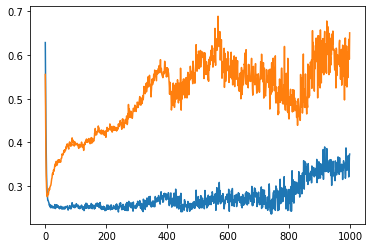

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

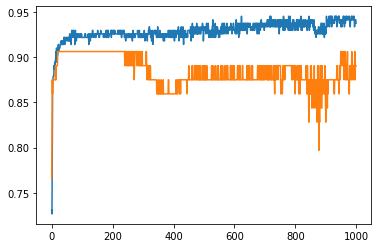

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Comparision between BGD Vs SGD

- Batch Gradient Descent is faster in same number of epochs
- Stochastic Gradient Descent convergence faster


 ### Spiky Stochastic Gradient Descent is useful ?

    - yes: batch gradient descent can stop in local minima, where SGD not.
    - No: Not convergence at exact point but it is aproximation

 ### Vectorization:
    - we are smartly applying dot product instead of loop which is faster.
    - downside of vectorization is it will consume high ram during big datasets

# Mini Batch Gradient Descent

In [21]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=3))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

start = time.time()
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_scaled,y,epochs=100,batch_size=150,validation_split=0.2)
print(time.time()-start)

Epoch 1/100
3/3 [==============================] - 0s 47ms/step - loss: 0.7124 - accuracy: 0.4969 - val_loss: 0.7059 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6980 - accuracy: 0.5125 - val_loss: 0.7026 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6883 - accuracy: 0.5125 - val_loss: 0.7017 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6809 - accuracy: 0.5125 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6745 - accuracy: 0.5219 - val_loss: 0.6982 - val_accuracy: 0.4875
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6692 - accuracy: 0.5312 - val_loss: 0.6973 - val_accuracy: 0.4875
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6635 - accuracy: 0.5375 - val_loss: 0.6954 - val_accuracy: 0.4875
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 17ms/step - loss: 0.4301 - accuracy: 0.8344 - val_loss: 0.5872 - val_accuracy: 0.6750
Epoch 60/100
3/3 [==============================] - 0s 17ms/step - loss: 0.4265 - accuracy: 0.8313 - val_loss: 0.5844 - val_accuracy: 0.6750
Epoch 61/100
3/3 [==============================] - 0s 16ms/step - loss: 0.4239 - accuracy: 0.8313 - val_loss: 0.5809 - val_accuracy: 0.6750
Epoch 62/100
3/3 [==============================] - 0s 15ms/step - loss: 0.4203 - accuracy: 0.8313 - val_loss: 0.5786 - val_accuracy: 0.6750
Epoch 63/100
3/3 [==============================] - 0s 16ms/step - loss: 0.4165 - accuracy: 0.8313 - val_loss: 0.5753 - val_accuracy: 0.6750
Epoch 64/100
3/3 [==============================] - 0s 19ms/step - loss: 0.4129 - accuracy: 0.8344 - val_loss: 0.5779 - val_accuracy: 0.6750
Epoch 65/100
3/3 [==============================] - 0s 16ms/step - loss: 0.4100 - accuracy: 0.8313 - val_loss: 0.5779 - val_accuracy: 0.6750
Epoch 66/100
3/3 [========

# Comparision between BGD Vs SGD vs MBGD
### faster in same no of epochs
- BGD > MBGD > SGD

### Faster Convergece
- SGD > MBGD > BGD

### why batch size is multiple of 2. like 2,4,8,16....
- RAM optimizer

- Minibatch Gradient descent solve vectorization RAM problem as it convert dataset into small batches

- if batch_size = 150 on above example :
    number of batches = 400/150 = 3
    batches are 150, 150, 100
    
- Generally we made a code with minibatch gradient descent.